<a href="https://colab.research.google.com/github/jaswantjayacumaar/Fantasy-Football-Forecast-Tool/blob/main/FPL_Prediction_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 13 11:22:20 2025

@author: JaswantJayacumaar
"""


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import math
from sklearn.linear_model import Ridge
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns



# Importing the dataset
dataset = pd.read_csv('Dataset.csv')

X = dataset.iloc[:, 15:26].values
#print(X)
y = dataset.iloc[:, 0].values
#print(y)
#X_try = dataset.iloc[38:, 19:].values
#print(X_try)
#y_try = dataset.iloc[39, 0].values
#print(y_try)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#X_try = sc_X.transform(X_try)



#fitting logisitic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)

classifier.fit(X_train,y_train)

#Predicting the train set results
y_predtrain=classifier.predict(X_train)
#Predicting the test set results
y_predtest=classifier.predict(X_test)


print('***************Logisitic Regression****************************')

print('Misclassified samples train: %d' % (y_train != y_predtrain).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: train %.2f' % accuracy_score(y_train, y_predtrain))
loss_i = 0
for i in range(0,len(y_predtrain)):
    loss_i = loss_i+np.sqrt(((y_train[i] - y_predtrain[i])**2)/20)
print('Average error train',loss_i/len(y_predtrain))
print('Misclassified samples test: %d' % (y_test != y_predtest).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: test %.2f' % accuracy_score(y_test, y_predtest))
loss_j = 0
for i in range(0,len(y_predtest)):
    loss_j = loss_j +np.sqrt(((y_test[i] - y_predtest[i])**2)/20)
print('Average error test',loss_j/len(y_predtest))
"""
print('^^^^^^^^^^^^^^^^^')

#Predicting the test set results
y_pred=classifier.predict(X_test)

print('Misclassified samples: test %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: test %.2f' % accuracy_score(y_test, y_pred))
"""
#print(y_pred)

#ytry=classifier.predict(X_try)

#print(ytry)



#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predtest)
#print(cm)
from sklearn.metrics import r2_score
R2_LS = r2_score(y_test,y_predtest)
print('\n R2_Train using Inversion --->', R2_LS)


#training steps
SVM_Model = SVC(random_state=0).fit(X_train, y_train)


print('***************SVM****************************')
#print('total training time %.10f' % tdiff)
print('*************Training data********************')
print('Number in train ',len(y_train))
y_pred = SVM_Model.predict(X_train)
mc_train = (y_train != y_pred).sum()
print('Misclassified samples: %d' % mc_train)
acc_train = accuracy_score(y_train, y_pred)
print('Accuracy: %.2f' % acc_train)
loss_i = 0
for i in range(0,len(y_pred)):
    loss_i = loss_i+np.sqrt(((y_train[i] - y_pred[i])**2)/20)
print('Average error train',loss_i/len(y_pred))
print('*************Testing data********************')
print('Number in test ',len(y_test))
y_pred = SVM_Model.predict(X_test)
mc_test = (y_test != y_pred).sum()
print('Misclassified samples: %d' % mc_test)
acc_test = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % acc_test)
loss_j=0
for i in range(0,len(y_pred)):
    loss_j = loss_j +np.sqrt(((y_test[i] - y_pred[i])**2)/20)
print('Average error test',loss_j/len(y_pred))


def classify(yy):
    for i in range(0,len(yy)):
        if(yy[i]>11):
            yy[i]=1
        else:
            yy[i]=0
    return yy

from sklearn.neighbors import KNeighborsClassifier # the algorithm

###############################################################################
# K Nearest Neighbor #
###############################################################################
print("")
print("----------------------------------------------------------------------")
print("KNN")
for neighs in [29]:
 print('\n',neighs,'neighbors')
 knn = KNeighborsClassifier(n_neighbors=neighs,p=2,metric='minkowski')
 y_train1 = classify(y_train)
 y_test1 = classify(y_test)
 knn.fit(X_train,y_train1)
 # run on the test data and print results and check accuracy
 y_pred = knn.predict(X_train)
 #print(y_pred)
 print('Number in train:\t',len(y_train1))
 print('Misclassified samples :\t%d' % (y_train1 != y_pred).sum())
 print('Accuracy of KNN :\t%.2f \n' % accuracy_score(y_train1, y_pred))
 # combine the train and test data
 X_combined_std = np.vstack((X_train, X_test))
 y_combined = np.hstack((y_train1, y_test1))
 print('Number in combined :\t',len(y_combined))
 # check results on combined data
 y_test_pred = knn.predict(X_combined_std)
 print('Misclassified samples :\t%d' % (y_combined != y_test_pred).sum())
 print('Train Accuracy of KNN :\t%.2f' % \
 accuracy_score(y_combined, y_test_pred))


from sklearn.ensemble import RandomForestClassifier # the algorithm

###############################################################################
# RANDOM FOREST CLASSIFIER #
###############################################################################
print("")
print("----------------------------------------------------------------------")
print("Random Forest Classifier")
for trees in [11]:
 print("\nNumber of trees:\t",trees)
 # create the classifier and train it
 # n_estimators is the number of trees in the forest
 # the entropy choice grades based on information gained
 # n_jobs allows multiple processors to be used
 forest = RandomForestClassifier(criterion='entropy', n_estimators=trees, \
 random_state=1, n_jobs=4)
 forest.fit(X_train,y_train)
 y_pred = forest.predict(X_test) # see how we do on the test data
 print('Number in test:\t',len(y_test))
 print('Misclassified samples:\t%d' % (y_test != y_pred).sum())
 print('Accuracy of random Forest Classifier:\t%.2f \n' % accuracy_score(y_test,
y_pred))
 # combine the train and test data
 X_combined = np.vstack((X_train, X_test))
 y_combined = np.hstack((y_train, y_test))
 print('Number in total :\t',len(y_combined))
 # see how we do on the combined data
 y_t = forest.predict(X_combined)
 print('Misclassified samples:\t%d' % (y_combined != y_t).sum())
 print('Total Accuracy of Random Forest Classifier:\t%.2f' % \
 accuracy_score(y_combined, y_t))



***************Logisitic Regression****************************
Misclassified samples train: 65
Accuracy: train 0.47
Average error train 0.5417465506462907
Misclassified samples test: 34
Accuracy: test 0.19
Average error test 0.6388765649999402

 R2_Train using Inversion ---> 0.10275276270560485
***************SVM****************************
*************Training data********************
Number in train  123
Misclassified samples: 58
Accuracy: 0.53
Average error train 0.4944800730731242
*************Testing data********************
Number in test  42
Misclassified samples: 32
Accuracy: 0.24
Average error test 0.7240601069999318

----------------------------------------------------------------------
KNN

 29 neighbors
Number in train:	 123
Misclassified samples :	24
Accuracy of KNN :	0.80 

Number in combined :	 165
Misclassified samples :	31
Train Accuracy of KNN :	0.81

----------------------------------------------------------------------
Random Forest Classifier

Number of trees:	 1

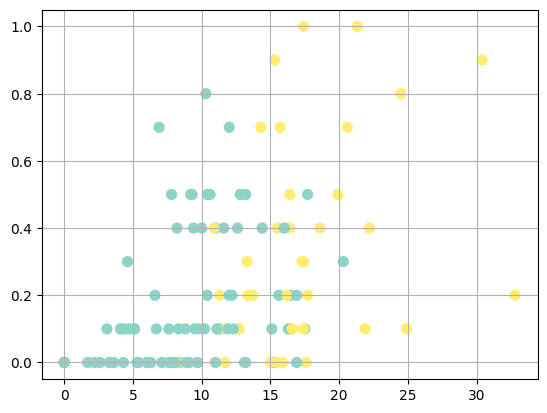

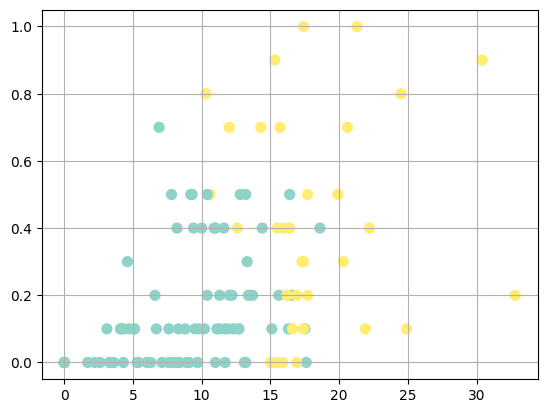

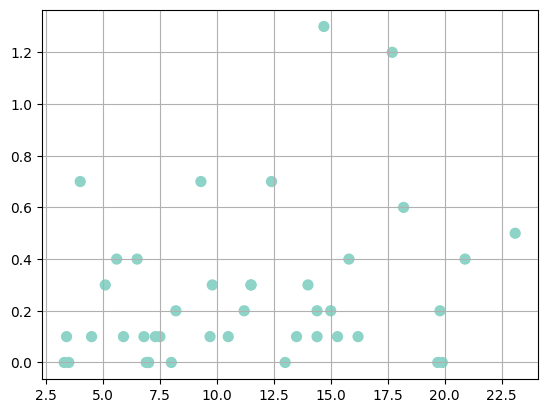

Accuracy scores
Accuracy of typical: 0.81
Accuracy of NBGAUSS: 0.76


In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 22 01:06:59 2024

@author: JaswantJayacumaar
"""

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
##
##      make data
##
from sklearn import datasets
#iris = datasets.load_iris()
##X = iris['sepal_length','sepal_width','petal_length','petal_width']
dataset = pd.read_csv('Dataset.csv')
X = dataset.iloc[:, 15:26].values
#print(X_train)
#print(X)
y = dataset.iloc[:, 0].values
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

"""
X_test = dataset_test.iloc[:, 16:21].values
#print(X_train)
#print(X)
y_test = dataset_test.iloc[:, 0].values
X_test = np.array(X_test)
y_test = np.array(y_test)
##print(y)
 ##X = iris.iloc[0:100,[2,3]]##y = iris.iloc[0:100,4]
"""
##print(y)
def classify(yy):
    for i in range(0,len(yy)):
        if(yy[i]>8):
            yy[i]=1
        else:
            yy[i]=0
    return yy
y_train = classify(y_train)
y_test = classify(y_test)
#print(y_train,len(y_train))

##plt.scatter(X[:, 0], X[:, 3],c=y, s=150, cmap='Set3')
##plt.grid()
##plt.show()
##
##
##plotting given data
plt.scatter(X_train[:, 0], X_train[:, 10], c=y_train, s=50, cmap='Set3')
plt.grid()
plt.show()
##mean function
def u(f,c):
    return X_train[np.where(y_train==c),f].mean()
##standar deviation function
def s(f,c):
    return X_train[np.where(y_train==c),f].std()
##Probablity of x given c
def PGauss(mu, sig, x):

    return np.exp(-np.power(x -mu, 2.) / (2 * np.power(sig, 2.) + 1e-300) )
##probablity of c
def Pc(c):
    return y_train.tolist().count(c)/len(y_train)

from numpy import ones
ypred = ones(len(y_train))
for i in range(0, len(y_train)):
    Pmax=0
    cmax=0
    for c in range (0, 2):

  ##print(c)
          Pcc = Pc(c)

          PG = ones(3)

          for f in range(0, 11):
              mu = u(f,c)
              sig = s(f,c)
         ## print(X[i,f])

         ############################computing probablity of occurance of X[i,f] given class 0#################
              PG[c]   = PG[c] * PGauss(mu, sig, X_train[i,f])
     ## print(PG)
     ## print(sig)
         ## print(PG)
         ############################computing probablity of class given an observation#################
          PG[c] = PG[c] * Pcc
          if (PG[c]>Pmax):
              Pmax = PG[c]
              cmax = c
    ##print(Cmax)
    ypred[i] = cmax

plt.scatter(X_train[:, 0], X_train[:, 10], c=ypred, s=50, cmap='Set3')
##plt.axis(lim);
plt.grid()
plt.show()

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
##
##
##
rng = np.random.RandomState(0)
Xnew = X_test
##Xnew = [-6, -14, -22, -30] + [14, 18, 22, 26] * rng.rand(3000, 4)
##print(Xnew)
ynew = model.predict(Xnew)
##print(ynew)

#print(y_test-ynew)

##
##
##

##lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 10], c=ynew, s=50, cmap='Set3')
##plt.axis(lim);
plt.grid()
plt.show()
from sklearn.metrics import accuracy_score
print('Accuracy scores')

print('Accuracy of typical: %.2f' % accuracy_score(y_train, ypred))
print('Accuracy of NBGAUSS: %.2f' % accuracy_score(y_test, ynew))
